In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('psychological_state_dataset.csv')

In [ ]:
data['Mood State'] = data['Mood State'].astype('category')
data['Psychological State'] = data['Psychological State'].astype('category')

depression_data = data[data['Mood State'] == 'Sad']

<ipython-input-5-8135fb75505a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=depression_data, x='Psychological State', palette='viridis')


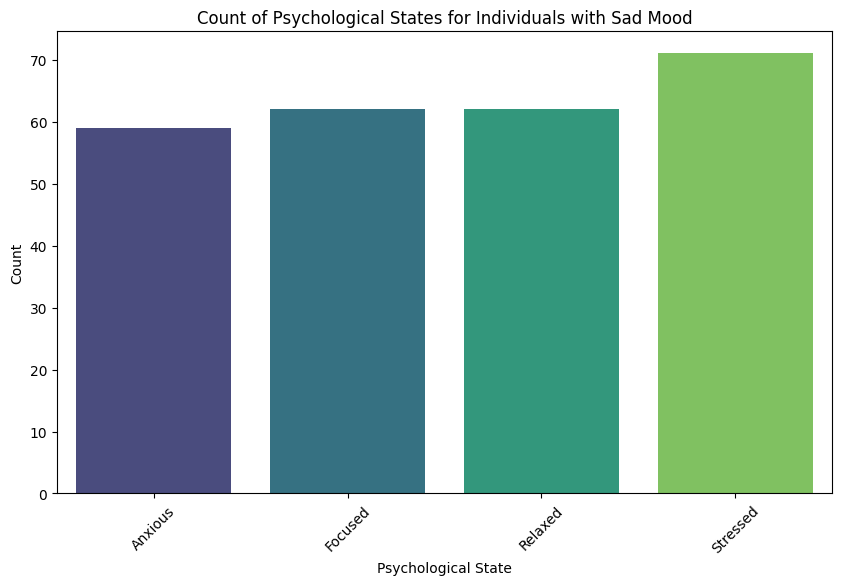

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=depression_data, x='Psychological State', palette='viridis')
plt.title('Count of Psychological States for Individuals with Sad Mood')
plt.xlabel('Psychological State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-6-e58360b478c1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=depression_data, x='Psychological State', y='HRV (ms)', palette='coolwarm')


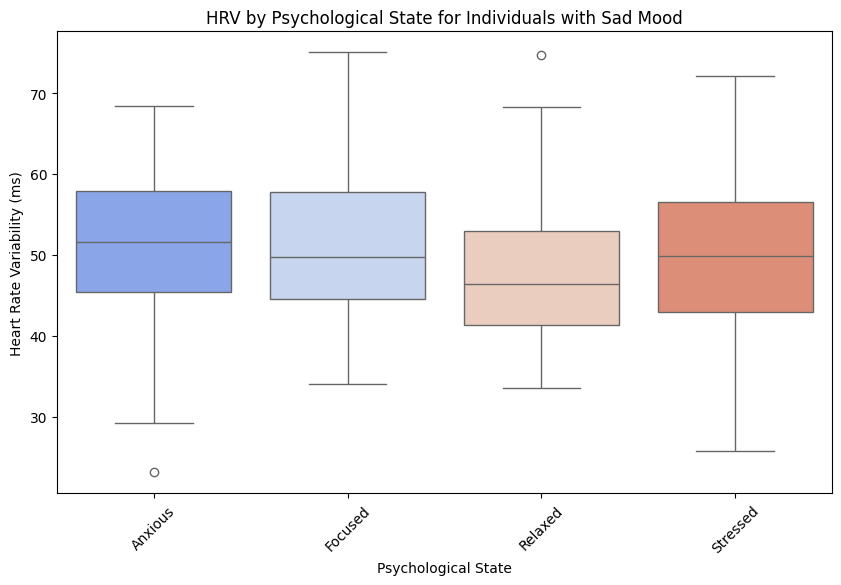

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=depression_data, x='Psychological State', y='HRV (ms)', palette='coolwarm')
plt.title('HRV by Psychological State for Individuals with Sad Mood')
plt.xlabel('Psychological State')
plt.ylabel('Heart Rate Variability (ms)')
plt.xticks(rotation=45)
plt.show()

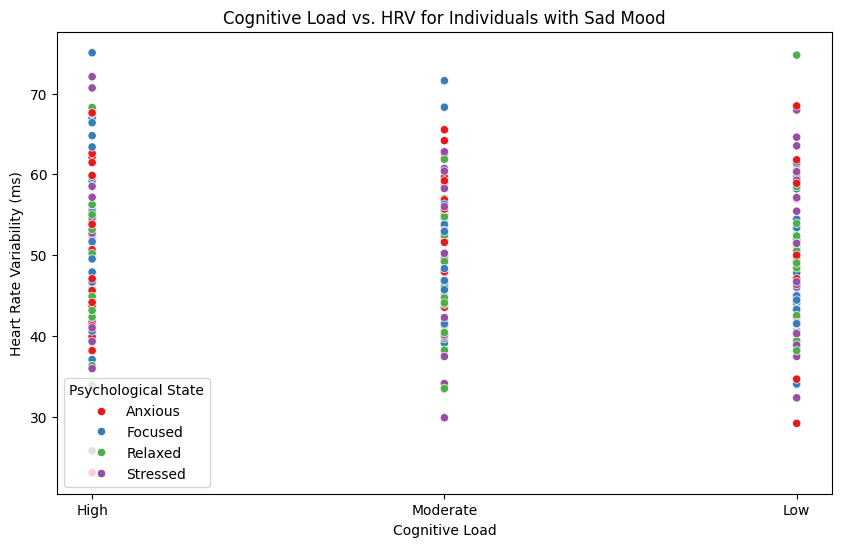

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=depression_data, x='Cognitive Load', y='HRV (ms)', hue='Psychological State', palette='Set1')
plt.title('Cognitive Load vs. HRV for Individuals with Sad Mood')
plt.xlabel('Cognitive Load')
plt.ylabel('Heart Rate Variability (ms)')
plt.legend(title='Psychological State')
plt.show()

In [ ]:
numeric_columns = depression_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = depression_data[numeric_columns].corr()

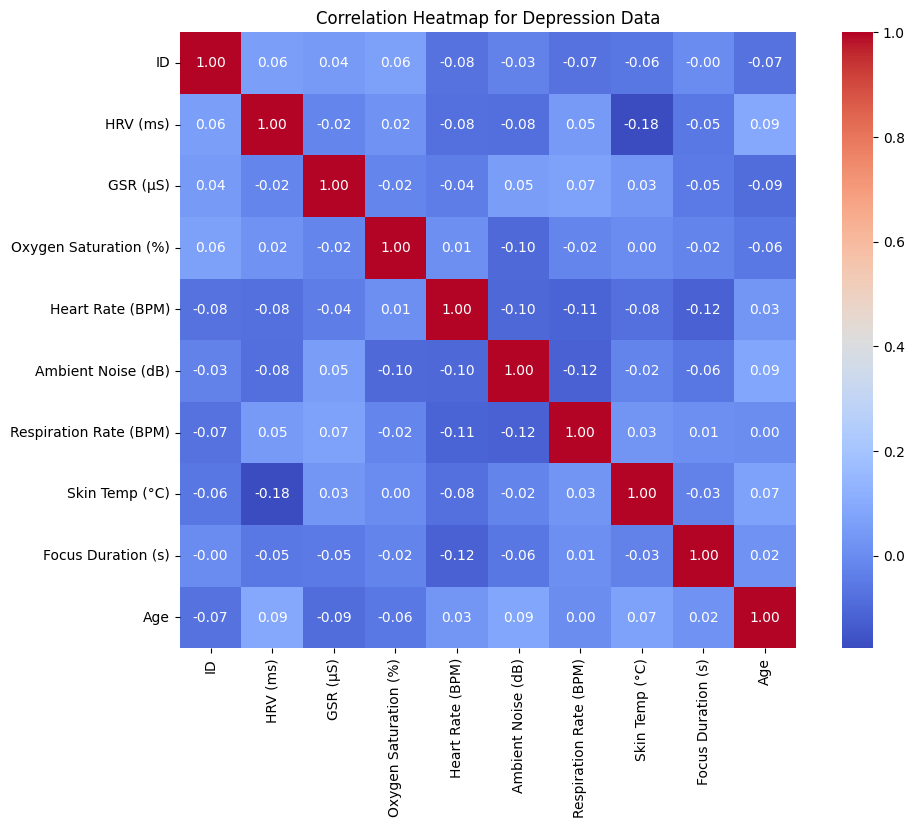

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap for Depression Data')
plt.show()

Using Plotly

In [ ]:
pip install plotly

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
data = pd.read_csv('psychological_state_dataset.csv')

data['Mood State'] = data['Mood State'].astype('category')
data['Psychological State'] = data['Psychological State'].astype('category')

depression_data = data[data['Mood State'] == 'Sad']

In [ ]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Age Distribution by Psychological State",
                                    "Count of Psychological States by Gender",
                                    "Count of Psychological States by Educational Level",
                                    "Age Distribution by Gender"))

fig.add_trace(
    go.Box(y=depression_data['Age'],
            name='Age',
            boxmean='sd',
            marker_color='lightblue'),
    row=1, col=1
)

gender_count = depression_data['Gender'].value_counts()
fig.add_trace(
    go.Bar(x=gender_count.index,
           y=gender_count.values,
           name='Gender Count',
           marker_color='lightgreen'),
    row=1, col=2
)


education_count = depression_data['Educational Level'].value_counts()
fig.add_trace(
    go.Bar(x=education_count.index,
           y=education_count.values,
           name='Education Count',
           marker_color='lightcoral'),
    row=2, col=1
)


fig.add_trace(
    go.Violin(y=depression_data[depression_data['Gender'] == 'Male']['Age'],
               name='Male',
               box_visible=True,
               line_color='blue',
               marker_color='lightblue'),
    row=2, col=2
)

fig.add_trace(
    go.Violin(y=depression_data[depression_data['Gender'] == 'Female']['Age'],
               name='Female',
               box_visible=True,
               line_color='red',
               marker_color='lightpink'),
    row=2, col=2
)


fig.update_layout(title_text='Depression Analysis by Age, Gender, and Education',
                  height=800,
                  showlegend=False)


fig.show()

The analysis reveals that younger individuals, particularly those in their late teens to early 20s, and undergraduate students exhibit higher levels of depression, likely due to academic and social pressures. Gender-wise, depression prevalence is higher among females, potentially due to societal expectations and emotional burdens. These insights emphasize the need for demographic-specific mental health interventions in educational settings.